In [1]:
# Fix all version conflicts (run this once)
!pip install -U pip
!pip uninstall -y transformers huggingface_hub
!pip install transformers==4.40.2 sentence-transformers==2.2.2 huggingface_hub==0.24.6 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1
Found existing installation: huggingface-hub 0.36.0
Uninstalling huggingface-hub-0.36.0:
  Successfully uninstalled huggingface-hub-0.36.0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.17.1 requires huggingface_hub>=0.25.0, but you have huggingface-hub 0.24.6 which is incompatible.
gradio 5.49.1 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.24.6 which i

In [2]:
from sentence_transformers import SentenceTransformer


In [3]:
# STEP 1 — Setup
!pip install sentence-transformers --quiet

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import IsolationForest
import re
from google.colab import files

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [4]:
# STEP 2 — Upload chat file
uploaded = files.upload()

filename = list(uploaded.keys())[0]
with open(filename, "r", encoding="utf-8") as f:
    lines = f.readlines()

print("✅ File uploaded. Total messages:", len(lines))
print("Example lines:\n", lines[:5])


Saving group_chat_messages.txt to group_chat_messages.txt
✅ File uploaded. Total messages: 1000
Example lines:
 ['[2025-10-30 15:45:17] Simran: Some of the guys were talking about being wasted.\n', '[2025-10-27 05:55:17] Karan: They were giggling and acting weird after taking something.\n', '[2025-10-27 09:24:17] Neha: GG everyone, that was fun.\n', '[2025-10-30 17:33:17] Neha: I heard rumors of pills being sold nearby.\n', '[2025-10-26 20:10:17] Sneha: Practice tomorrow at the usual spot.\n']


In [5]:
# STEP 3 — Clean and extract users + messages
data = []
for line in lines:
    match = re.match(r"\[.*?\]\s*(.*?):\s*(.*)", line.strip())
    if match:
        user, msg = match.groups()
        data.append((user, msg))

df = pd.DataFrame(data, columns=["user", "message"])
print("✅ Parsed messages:")
df.head()


✅ Parsed messages:


,user,message
0,Simran,Some of the guys were talking about being wasted.
1,Karan,They were giggling and acting weird after taki...
2,Neha,"GG everyone, that was fun."
3,Neha,I heard rumors of pills being sold nearby.
4,Sneha,Practice tomorrow at the usual spot.


In [6]:
# STEP 4 — Generate embeddings and a summary of the main topic
model = SentenceTransformer('all-MiniLM-L6-v2')

# Embed all messages
embeddings = model.encode(df['message'].tolist())

# Compute mean vector (represents main discussion)
centroid = np.mean(embeddings, axis=0)

# Find the 5 most similar messages (most representative of the main topic)
sims = cosine_similarity([centroid], embeddings)[0]
df['similarity_to_main'] = sims

main_topic_msgs = df.sort_values('similarity_to_main', ascending=False).head(5)['message'].tolist()
summary_text = " ".join(main_topic_msgs)
print("🧾 Summary of Main Chat Discussion (automatically extracted):\n")
print(summary_text)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'cached_download' (from 'huggingface_hub.file_download') is deprecated and will be removed from version '0.26'. Use `hf_hub_download` instead.
  warnings.warn(warning_message, FutureWarning)


.gitattributes: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

model.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

model_O1.onnx:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

model_O2.onnx:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

model_O3.onnx:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

model_O4.onnx:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

model_qint8_arm64.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

model_qint8_avx512.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

model_qint8_avx512_vnni.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

model_quint8_avx2.onnx:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

openvino_model.xml: 0.00B [00:00, ?B/s]

openvino_model_qint8_quantized.bin:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

openvino_model_qint8_quantized.xml: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

🧾 Summary of Main Chat Discussion (automatically extracted):

Practice tomorrow at the usual spot. Practice tomorrow at the usual spot. Practice tomorrow at the usual spot. Practice tomorrow at the usual spot. Practice tomorrow at the usual spot.


In [7]:
# STEP 5 — Flag outliers (messages different from the main topic)
# Compute similarity to the centroid (already done)
df['zscore'] = (df['similarity_to_main'] - df['similarity_to_main'].mean()) / (df['similarity_to_main'].std() + 1e-9)

# Threshold for being "different"
threshold = -1.0  # lower = more different
df['is_different'] = (df['zscore'] < threshold).astype(int)

# Show only messages that differ significantly
outliers = df[df['is_different'] == 1].sort_values('similarity_to_main')
print(f"⚠️ Found {len(outliers)} messages that differ from the main chat context.\n")
outliers[['user', 'message', 'similarity_to_main']].head(15)


⚠️ Found 225 messages that differ from the main chat context.



,user,message,similarity_to_main
3,Neha,I heard rumors of pills being sold nearby.,0.167853
28,Divya,I heard rumors of pills being sold nearby.,0.167853
218,Simran,I heard rumors of pills being sold nearby.,0.167853
151,Arjun,I heard rumors of pills being sold nearby.,0.167853
240,Neha,I heard rumors of pills being sold nearby.,0.167853
244,Sneha,I heard rumors of pills being sold nearby.,0.167853
360,Amit,I heard rumors of pills being sold nearby.,0.167853
496,Amit,I heard rumors of pills being sold nearby.,0.167853
465,Neha,I heard rumors of pills being sold nearby.,0.167853
518,Sneha,I heard rumors of pills being sold nearby.,0.167853


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('user').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['similarity_to_main']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('similarity_to_main', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user')):
  _plot_series(series, series_name, i)
  fig.legend(title='user', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('similarity_to_main')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['similarity_to_main']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'similarity_to_main'}, axis=1)
              .sort_values('similarity_to_main', ascending=True))
  xs = counted['similarity_to_main']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('similarity_to_main', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user')):
  _plot_series(series, series_name, i)
  fig.legend(title='user', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('similarity_to_main')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['user'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='user', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
# STEP 6 — Save outlier messages
outliers.to_csv("different_messages.csv", index=False)
print("📁 Saved different messages to 'different_messages.csv'")

# To download in Colab:
files.download("different_messages.csv")


📁 Saved different messages to 'different_messages.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!pip install -U pip
!pip uninstall -y transformers huggingface_hub -q
!pip install transformers==4.40.2 sentence-transformers==2.2.2 huggingface_hub==0.24.6 --quiet

import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from google.colab import files


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.17.1 requires huggingface_hub>=0.25.0, but you have huggingface-hub 0.24.6 which is incompatible.
gradio 5.49.1 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.24.6 which is incompatible.
diffusers 0.35.2 requires huggingface-hub>=0.34.0, but you have huggingface-hub 0.24.6 which is incompatible.


In [10]:
uploaded = files.upload()

filename = list(uploaded.keys())[0]
with open(filename, "r", encoding="utf-8") as f:
    lines = f.readlines()

print("✅ File uploaded. Total lines:", len(lines))


Saving group_chat_messages_v2.txt to group_chat_messages_v2.txt
✅ File uploaded. Total lines: 53


In [11]:
data = []
for line in lines:
    match = re.match(r"\[.*?\]\s*(.*?):\s*(.*)", line.strip())
    if match:
        user, msg = match.groups()
        data.append((user.strip(), msg.strip()))

df = pd.DataFrame(data, columns=["user", "message"])
print("✅ Parsed messages:")
df.head()


✅ Parsed messages:


,user,message
0,Rohan,Morning guys! Anyone up for cricket today?
1,Meena,Sure! Let’s meet at the park after lunch.
2,Akash,"Bring your bats, I’ll bring the new ball."
3,Priya,"Count me in, I’ll keep the water bottles ready."
4,Ravi,"I can’t come today, got office work :("


In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = model.encode(df['message'].tolist())
centroid = np.mean(embeddings, axis=0)

# Cosine similarity → closeness to main topic
df['similarity_to_main'] = cosine_similarity([centroid], embeddings)[0]

# Top 5 most representative messages
summary_msgs = df.sort_values('similarity_to_main', ascending=False).head(5)['message'].tolist()
summary_text = " ".join(summary_msgs)

print("🧾 Auto-summary of main discussion:\n")
print(summary_text)


🧾 Auto-summary of main discussion:

I’ll open the bowling. Morning guys! Anyone up for cricket today? Focus on tomorrow’s match bro. Bring your bats, I’ll bring the new ball. Sure! Let’s meet at the park after lunch.


In [13]:
from scipy.special import expit  # sigmoid

df['dissimilarity_index'] = 1 - df['similarity_to_main']
mean_sim = df['similarity_to_main'].mean()
std_sim = df['similarity_to_main'].std() + 1e-9
df['zscore'] = (df['similarity_to_main'] - mean_sim) / std_sim

# Suspicion confidence — scaled sigmoid
df['suspicion_confidence'] = expit(-df['zscore'] * 1.5)

# Flag suspicious if below threshold
df['is_suspicious'] = (df['suspicion_confidence'] > 0.7).astype(int)


In [14]:
sus_df = df[df['is_suspicious'] == 1].sort_values('suspicion_confidence', ascending=False)
print(f"⚠️ Total suspicious messages found: {len(sus_df)}\n")
sus_df[['user','message','similarity_to_main','dissimilarity_index','zscore','suspicion_confidence']].head(10)


⚠️ Total suspicious messages found: 12



,user,message,similarity_to_main,dissimilarity_index,zscore,suspicion_confidence
42,Priya,Admin should delete those messages.,0.186326,0.813674,-3.087450,0.990351
31,Ankit,Anyone tried LSD? Heard it’s a wild experience.,0.294724,0.705276,-1.707555,0.928331
21,Priya,"Ankit that’s not safe, don’t get into that.",0.297381,0.702619,-1.673741,0.924882
7,Rohan,Haha nice one Sneha!,0.300825,0.699175,-1.629889,0.920183
39,Jay,Anyone knows a place to get ecstasy?,0.318043,0.681957,-1.410711,0.892455
20,Ankit,Anyone know where to get some weed? I heard so...,0.330831,0.669169,-1.247914,0.866675
25,Meena,"That’s really not something to mess with, dude.",0.346263,0.653737,-1.051473,0.828809
13,Jay,Hey anyone tried hash before?,0.349693,0.650307,-1.007814,0.819316
43,Meena,"Agreed, it’s not okay.",0.361001,0.638999,-0.863860,0.785126
15,Jay,"Chill, I was just curious.",0.367042,0.632958,-0.786956,0.765026


In [15]:
top_users = sus_df['user'].value_counts().reset_index()
top_users.columns = ['user', 'suspicious_message_count']
print("\n👤 Top users with suspicious messages:\n")
print(top_users.head(10))



👤 Top users with suspicious messages:

    user  suspicious_message_count
0    Jay                         3
1  Priya                         2
2  Ankit                         2
3  Rohan                         2
4  Meena                         2
5  Sneha                         1


In [16]:
sus_df.to_csv("suspicious_messages_detailed.csv", index=False)
files.download("suspicious_messages_detailed.csv")

print("\n📁 Saved detailed suspicious message analysis.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📁 Saved detailed suspicious message analysis.


In [17]:
!pip install matplotlib seaborn plotly --quiet

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [19]:
df.columns


Index(['user', 'message', 'similarity_to_main', 'dissimilarity_index',
       'zscore', 'suspicion_confidence', 'is_suspicious'],
      dtype='object')

In [20]:
# Example fix
if "label" not in df.columns:
    if "predicted_label" in df.columns:
        df = df.rename(columns={"predicted_label": "label"})
    elif "is_suspicious" in df.columns:
        df = df.rename(columns={"is_suspicious": "label"})
    else:
        # If you have no label column, create one from confidence threshold
        df["label"] = (df["suspicion_confidence"] > 0.5).astype(int)


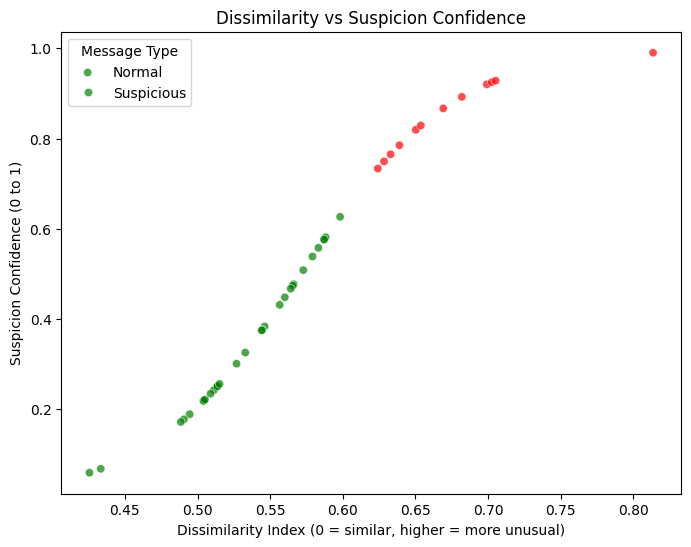

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="dissimilarity_index",
    y="suspicion_confidence",
    hue="label",
    palette={0: "green", 1: "red"},
    alpha=0.7
)
plt.title("Dissimilarity vs Suspicion Confidence")
plt.xlabel("Dissimilarity Index (0 = similar, higher = more unusual)")
plt.ylabel("Suspicion Confidence (0 to 1)")
plt.legend(title="Message Type", labels=["Normal","Suspicious"])
plt.show()


/tmp/ipython-input-641997692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sus_users.values, y=sus_users.index, palette="Reds_r")


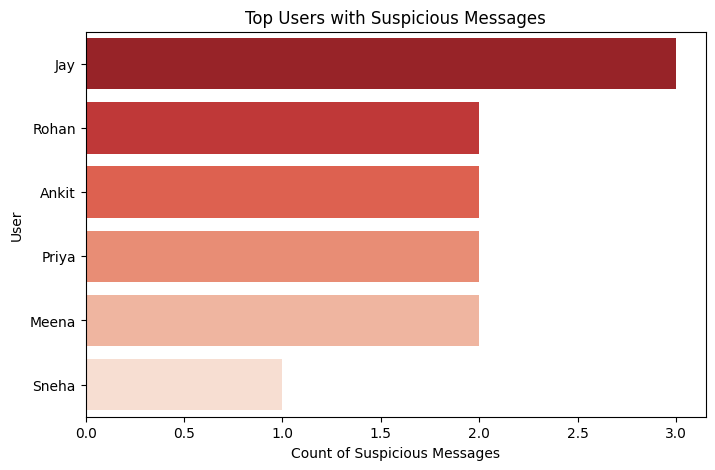

In [22]:
plt.figure(figsize=(8,5))
sus_users = df[df["label"]==1]["user"].value_counts().head(10)
sns.barplot(x=sus_users.values, y=sus_users.index, palette="Reds_r")
plt.title("Top Users with Suspicious Messages")
plt.xlabel("Count of Suspicious Messages")
plt.ylabel("User")
plt.show()


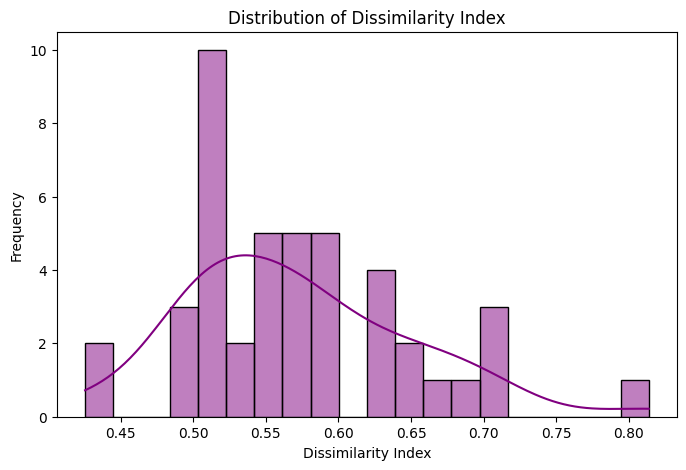

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df["dissimilarity_index"], bins=20, kde=True, color="purple")
plt.title("Distribution of Dissimilarity Index")
plt.xlabel("Dissimilarity Index")
plt.ylabel("Frequency")
plt.show()


In [24]:
fig = px.scatter(
    df,
    x="dissimilarity_index",
    y="suspicion_confidence",
    color=df["label"].map({0:"Normal",1:"Suspicious"}),
    size="suspicion_confidence",
    hover_data=["user","message"],
    title="Interactive Suspicious Message Detection Overview"
)
fig.show()


In [25]:
summary = df.groupby("user").agg({
    "label":"sum",
    "dissimilarity_index":"mean",
    "suspicion_confidence":"mean"
}).rename(columns={
    "label":"Suspicious_Message_Count",
    "dissimilarity_index":"Avg_Dissimilarity",
    "suspicion_confidence":"Avg_Confidence"
}).sort_values(by="Suspicious_Message_Count", ascending=False)

display(summary.head(10))


,Suspicious_Message_Count,Avg_Dissimilarity,Avg_Confidence
user,,,
Jay,3,0.632721,0.737669
Rohan,2,0.545324,0.418200
Ankit,2,0.629166,0.681015
Meena,2,0.575000,0.516159
Priya,2,0.616456,0.578820
Sneha,1,0.554466,0.431500
Akash,0,0.509320,0.241730
Ravi,0,0.556644,0.436440
Vikram,0,0.541735,0.372569
